<a href="https://colab.research.google.com/github/greatsong/2021fastai_study/blob/main/fastai_chaper2(210912).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fastai2

In [ ]:
# 코랩일 경우 런타임 - 런타임 유형 변경 - GPU 설정 후 실행하세요!

In [1]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 위 코드 실행 후 [메뉴] - [런타임] - [런타임 다시 시작] - [예]

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') 

In [2]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 27.2 MB/s 
     |████████████████████████████████| 186 kB 45.6 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 311 kB/s 


In [3]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
# azure 가입(카드 번호 입력, free 플랜으로 선택, 리소스로 이동 등 신경쓸 것들이 조금 있음)
# 정확히 '키1, 키2'가 보이는 페이지에서 복붙해야함!
key = '59f9d72003ff4622b3b8facfda8ec378'

In [18]:
search_images_bing

<function fastbook.search_images_bing>

In [6]:
result1 = search_images_bing(key, '천혜향')
result2 = search_images_bing(key, '한라봉')
result3 = search_images_bing(key, '귤')

In [32]:
ims = result1.attrgot('contentUrl')
len(ims)

150

In [33]:
ims[0]

'https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F032D54495194804423'

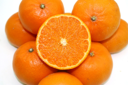

In [34]:
dest1 = '/images/천혜향.jpg' # images 앞에 / 붙여야 함!
download_url(ims[0], dest1)

im = Image.open(dest1)
im.to_thumb(128,128)

In [7]:
fruit_types = '천혜향', '한라봉', '귤'
path = Path('/fruit') # / 붙여야 함!

In [8]:
if not path.exists() :
  path.mkdir() 
  for o in fruit_types : 
    print(path, o) # 확인용
    dest = (path/o)
    print(dest) # 확인용
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key, o)
    download_images(dest, urls = results.attrgot('contentUrl'))

/fruit 천혜향
/fruit/천혜향
/fruit 한라봉
/fruit/한라봉
/fruit 귤
/fruit/귤


In [25]:
ls

gdrive/  sample_data/


In [9]:
fns = get_image_files(path)

In [27]:
fns

(#403) [Path('/fruit/한라봉/00000027.jpg'),Path('/fruit/한라봉/00000056.jpg'),Path('/fruit/한라봉/00000146.jpg'),Path('/fruit/한라봉/00000131.jpg'),Path('/fruit/한라봉/00000004.jpg'),Path('/fruit/한라봉/00000124.jpg'),Path('/fruit/한라봉/00000096.jpg'),Path('/fruit/한라봉/00000137.png'),Path('/fruit/한라봉/00000040.jpeg'),Path('/fruit/한라봉/00000093.png')...]

In [28]:
failed = verify_images(fns)

In [29]:
failed

(#0) []

In [30]:
# 데이터 로더스

In [10]:
fruits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                   get_y = parent_label,
                   item_tfms = Resize(128))

In [11]:
dls = fruits.dataloaders(path)

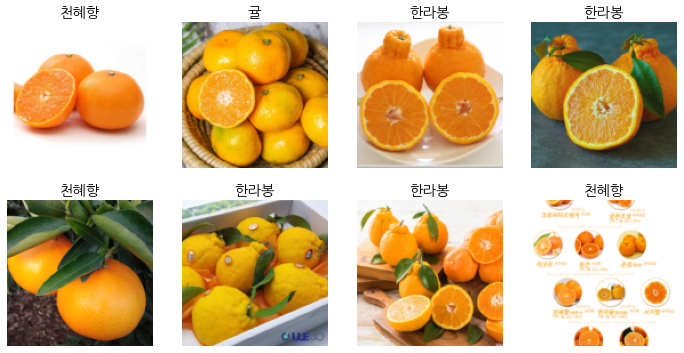

In [34]:
dls.valid.show_batch(max_n = 8, nrows = 2)

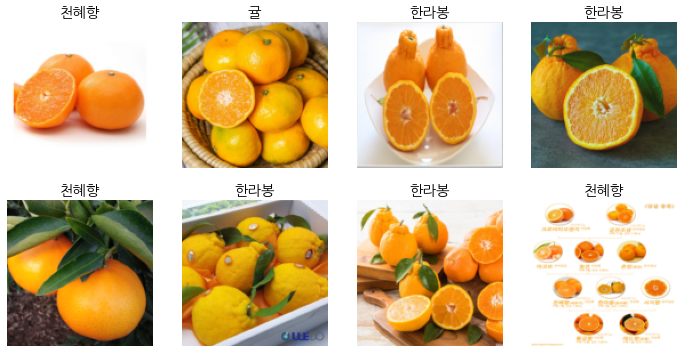

In [35]:
f = fruits.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

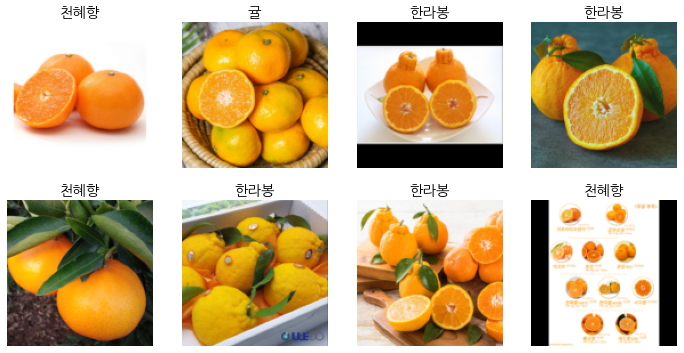

In [36]:
f = fruits.new(item_tfms = Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

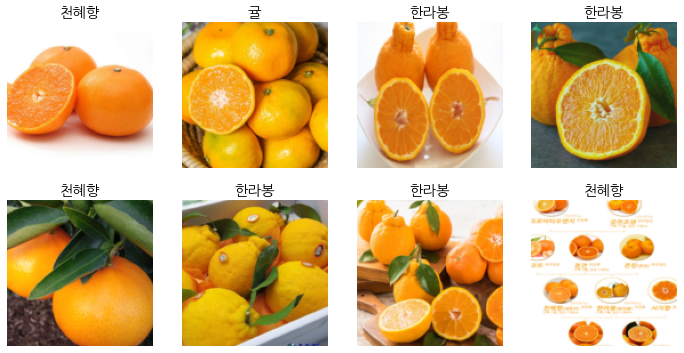

In [37]:
f = fruits.new(item_tfms = RandomResizedCrop(128, min_scale = 0.3))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

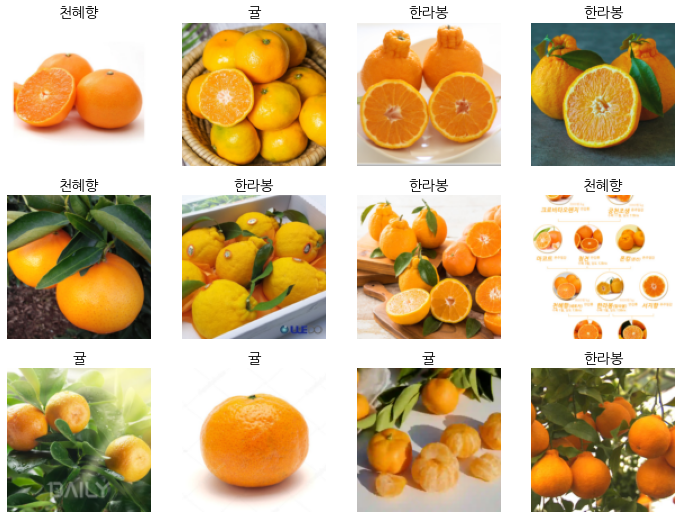

In [50]:
f = fruits.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 4.9)) # 5 이상이면 작동 안됨
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n = 12, nrows = 3)

In [12]:
fruits = fruits.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), 
               batch_tfms = aug_transforms()) 
dls = fruits.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [13]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


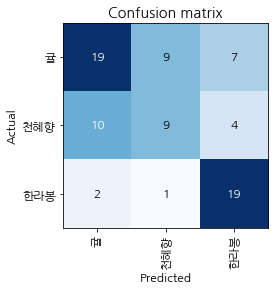

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

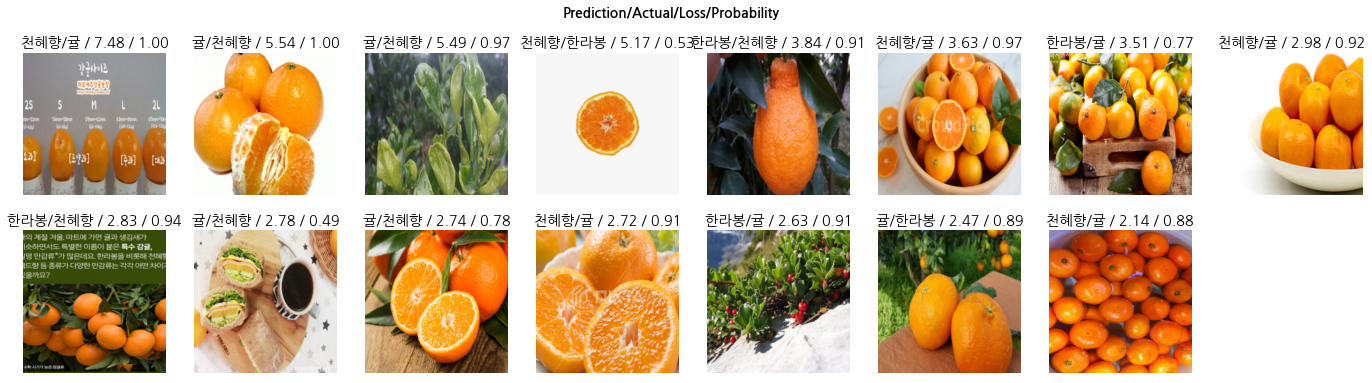

In [16]:
interp.plot_top_losses(15, nrows=2)

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [20]:
cleaner.delete()

(#2) [1,15]

In [21]:
for idx in cleaner.delete() : 
  cleaner.fns[idx].unlink()

In [22]:
cleaner.change()

(#0) []

In [23]:
for idx, cat in cleaner.change() : 
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [24]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [35]:
learn_inf.predict('/images/천혜향.jpg') # 귤이라고 생각할만 함...;;;

('귤', tensor(0), tensor([0.5176, 0.2562, 0.2262]))

In [37]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
img = PILImage.create(btn_upload.data[-1])

In [39]:
out_pl = widgets.Output()

In [40]:
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [41]:
pred, pred_idx, probs = learn_inf.predict(img)

In [43]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}, Probability : {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 한라봉, Probability : 0.9451')

In [44]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [2]:
!pip install voila

     |████████████████████████████████| 1.6 MB 5.2 MB/s 
     |████████████████████████████████| 551 kB 76.5 MB/s 
     |████████████████████████████████| 112 kB 80.3 MB/s 
     |████████████████████████████████| 393 kB 80.1 MB/s 
     |████████████████████████████████| 428 kB 74.3 MB/s 
     |████████████████████████████████| 77 kB 7.7 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [1]:
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
